In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score

In [2]:
df = pd.read_csv(r"C:\Users\anssa\OneDrive\Documents\student_dropout_prediction_app\fully_transformed_student_dataset.csv")

In [3]:
df.head()

,Marital Status,Application Mode,Application Order,Course Name,Daytime/Evening Attendance,Previous Qualification,Nationality,Mother's Qualification,Father's Qualification,Mother's Occupation,...,Credited Units (2nd Sem),Enrolled Units (2nd Sem),Evaluated Units (2nd Sem),Approved Units (2nd Sem),Average Grade (2nd Sem),Not Evaluated Units (2nd Sem),Unemployment Rate (%),Inflation Rate (%),GDP per Capita (USD),Student Status
0,Single,2nd phase—general contingent,5,Animation and Multimedia Design,Daytime,Secondary education,Portuguese,General commerce course,Other—11th Year,Service/Sales/Security,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,Single,International student (bachelor),1,Tourism,Daytime,Secondary education,Portuguese,Secondary Education,Higher Education Degree,Technicians & Professionals,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,Single,1st phase—general contingent,5,Communication Design,Daytime,Secondary education,Portuguese,Administration & Commerce course,Basic Edu 1st Cycle,Unskilled Workers,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,Single,2nd phase—general contingent,2,Journalism and Communication,Daytime,Secondary education,Portuguese,Accounting & Admin course,Basic Edu 1st Cycle,Service/Sales/Security,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,Married,Over 23 years old,1,Social Service (evening attendance),Evening,Secondary education,Portuguese,Administration & Commerce course,Basic Edu 2nd Cycle,Unskilled Workers,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [4]:
df.shape

(4424, 35)

In [5]:
df.columns

Index(['Marital Status', 'Application Mode', 'Application Order',
       'Course Name', 'Daytime/Evening Attendance', 'Previous Qualification',
       'Nationality', 'Mother's Qualification', 'Father's Qualification',
       'Mother's Occupation', 'Father's Occupation', 'Displaced Student',
       'Special Educational Needs', 'Is Debtor', 'Tuition Fees Up-to-Date',
       'Gender (1=Male, 0=Female)', 'Scholarship Holder', 'Age at Enrollment',
       'International Student', 'Credited Units (1st Sem)',
       'Enrolled Units (1st Sem)', 'Evaluated Units (1st Sem)',
       'Approved Units (1st Sem)', 'Average Grade (1st Sem)',
       'Not Evaluated Units (1st Sem)', 'Credited Units (2nd Sem)',
       'Enrolled Units (2nd Sem)', 'Evaluated Units (2nd Sem)',
       'Approved Units (2nd Sem)', 'Average Grade (2nd Sem)',
       'Not Evaluated Units (2nd Sem)', 'Unemployment Rate (%)',
       'Inflation Rate (%)', 'GDP per Capita (USD)', 'Student Status'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Marital Status                 4424 non-null   object 
 1   Application Mode               4424 non-null   object 
 2   Application Order              4424 non-null   int64  
 3   Course Name                    4424 non-null   object 
 4   Daytime/Evening Attendance     4424 non-null   object 
 5   Previous Qualification         4424 non-null   object 
 6   Nationality                    4424 non-null   object 
 7   Mother's Qualification         4424 non-null   object 
 8   Father's Qualification         4424 non-null   object 
 9   Mother's Occupation            4424 non-null   object 
 10  Father's Occupation            4424 non-null   object 
 11  Displaced Student              4424 non-null   object 
 12  Special Educational Needs      4424 non-null   o

In [7]:
#Since our data contains no null values that is a big relief
print(df.duplicated().sum())

0


In [8]:
df.rename(columns={'Student Status':'Target','Age at Enrollment':'Age'},inplace=True)
df.sample(10)

,Marital Status,Application Mode,Application Order,Course Name,Daytime/Evening Attendance,Previous Qualification,Nationality,Mother's Qualification,Father's Qualification,Mother's Occupation,...,Credited Units (2nd Sem),Enrolled Units (2nd Sem),Evaluated Units (2nd Sem),Approved Units (2nd Sem),Average Grade (2nd Sem),Not Evaluated Units (2nd Sem),Unemployment Rate (%),Inflation Rate (%),GDP per Capita (USD),Target
2552,Single,1st phase—general contingent,1,Social Service (evening attendance),Evening,Secondary education,Portuguese,Accounting & Admin course,Basic Edu 1st Cycle,Service/Sales/Security,...,0,6,6,6,11.500000,0,12.7,3.7,-1.70,Graduate
1369,Single,Short cycle diploma holders,1,Advertising and Marketing Management,Daytime,Professional higher technical course,Portuguese,Secondary Education,Basic Education 3rd Cycle,Unskilled Workers,...,0,6,7,6,12.857143,0,8.9,1.4,3.51,Graduate
1249,Single,1st phase—general contingent,2,Basic Education,Daytime,Secondary education,Portuguese,Accounting & Admin course,Basic Edu 1st Cycle,Service/Sales/Security,...,0,6,10,5,11.800000,0,9.4,-0.8,-3.12,Dropout
2478,Single,1st phase—general contingent,1,Nursing,Daytime,Secondary education,Portuguese,Secondary Education,Basic Education 3rd Cycle,Administrative Staff,...,0,8,11,7,11.347143,0,12.4,0.5,1.79,Graduate
2450,Single,1st phase—general contingent,1,Animation and Multimedia Design,Daytime,Secondary education,Portuguese,Secondary Education,Basic Edu 2nd Cycle,Service/Sales/Security,...,0,0,0,0,0.000000,0,9.4,-0.8,-3.12,Enrolled
658,Single,Change in course,1,Communication Design,Daytime,Secondary education,Portuguese,Secondary Education,Basic Education 3rd Cycle,Service/Sales/Security,...,0,6,9,5,12.400000,0,12.7,3.7,-1.70,Graduate
2029,Single,1st phase—general contingent,1,Journalism and Communication,Daytime,Secondary education,Portuguese,Administration & Commerce course,Basic Edu 2nd Cycle,Unskilled Workers,...,0,6,6,6,13.666667,0,12.7,3.7,-1.70,Graduate
4398,Single,Over 23 years old,1,Management,Daytime,Secondary education,Portuguese,Accounting & Admin course,Basic Edu 2nd Cycle,Skilled Industry Workers,...,0,5,10,4,12.250000,2,16.2,0.3,-0.92,Graduate
91,Single,2nd phase—general contingent,2,Journalism and Communication,Daytime,Secondary education,Brazilian,General commerce course,Secondary Education,Unskilled Workers,...,0,6,6,6,13.500000,0,8.9,1.4,3.51,Graduate
1096,Single,2nd phase—general contingent,1,Advertising and Marketing Management,Daytime,Higher education—degree,Portuguese,Other—11th Year,Higher Education Degree,Service/Sales/Security,...,0,6,9,0,0.000000,0,10.8,1.4,1.74,Dropout


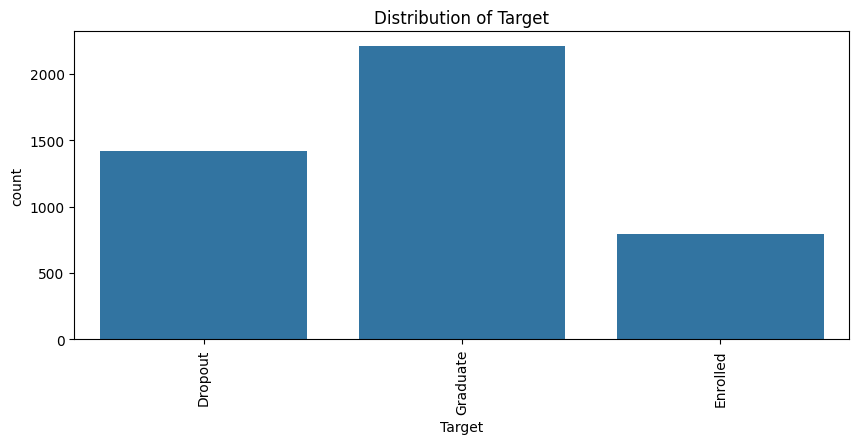

In [9]:
plt.figure(figsize=(10, 4))
sns.countplot(x=df['Target'], data=df)
plt.title('Distribution of Target')
plt.xticks(rotation=90)
plt.show()

#There is an imbalance so we have to keep that in account

In [10]:
df['Target'] = df['Target'].map({
    'Dropout':0,
    'Enrolled':1,
    'Graduate':2
})

In [11]:
print(df["Target"].unique())

[0 2 1]


In [12]:
df.corr()['Target']

ValueError: could not convert string to float: 'Single'

In [13]:
df.dtypes

Marital Status                    object
Application Mode                  object
Application Order                  int64
Course Name                       object
Daytime/Evening Attendance        object
Previous Qualification            object
Nationality                       object
Mother's Qualification            object
Father's Qualification            object
Mother's Occupation               object
Father's Occupation               object
Displaced Student                 object
Special Educational Needs         object
Is Debtor                         object
Tuition Fees Up-to-Date           object
Gender (1=Male, 0=Female)         object
Scholarship Holder                object
Age                                int64
International Student             object
Credited Units (1st Sem)           int64
Enrolled Units (1st Sem)           int64
Evaluated Units (1st Sem)          int64
Approved Units (1st Sem)           int64
Average Grade (1st Sem)          float64
Not Evaluated Un

In [14]:
df.describe()

,Application Order,Age,Credited Units (1st Sem),Enrolled Units (1st Sem),Evaluated Units (1st Sem),Approved Units (1st Sem),Average Grade (1st Sem),Not Evaluated Units (1st Sem),Credited Units (2nd Sem),Enrolled Units (2nd Sem),Evaluated Units (2nd Sem),Approved Units (2nd Sem),Average Grade (2nd Sem),Not Evaluated Units (2nd Sem),Unemployment Rate (%),Inflation Rate (%),GDP per Capita (USD),Target
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.727848,23.265145,0.709991,6.270570,8.299051,4.706600,10.640822,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969,1.178119
std,1.313793,7.587816,2.360507,2.480178,4.179106,3.094238,4.843663,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935,0.888243
min,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,0.000000
25%,1.000000,19.000000,0.000000,5.000000,6.000000,3.000000,11.000000,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000,0.000000
50%,1.000000,20.000000,0.000000,6.000000,8.000000,5.000000,12.285714,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000,1.000000
75%,2.000000,25.000000,0.000000,7.000000,10.000000,6.000000,13.400000,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000,2.000000
max,9.000000,70.000000,20.000000,26.000000,45.000000,26.000000,18.875000,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000,2.000000


In [15]:
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    print(f"Unique values in column '{column}':")
    print(df[column].value_counts())
    print("-" * 40)

Unique values in column 'Marital Status':
Marital Status
Single               3919
Married               379
Divorced               91
Facto Union            25
Legally Separated       6
Widower                 4
Name: count, dtype: int64
----------------------------------------
Unique values in column 'Application Mode':
Application Mode
1st phase—general contingent                           1708
2nd phase—general contingent                            872
Over 23 years old                                       785
Change in course                                        312
Technological specialization diploma holders            213
Holders of other higher courses                         139
3rd phase—general contingent                            124
Transfer                                                 77
Change in institution/course                             59
1st phase—special contingent (Madeira Island)            38
Short cycle diploma holders                              35

In [16]:
df.drop(['Nationality','International Student','Special Educational Needs'],axis=1,inplace=True)

In [17]:
df.shape

(4424, 32)

In [18]:
import plotly.express as px

px.histogram(df['Age'], x='Age',color_discrete_sequence=['lightblue'])

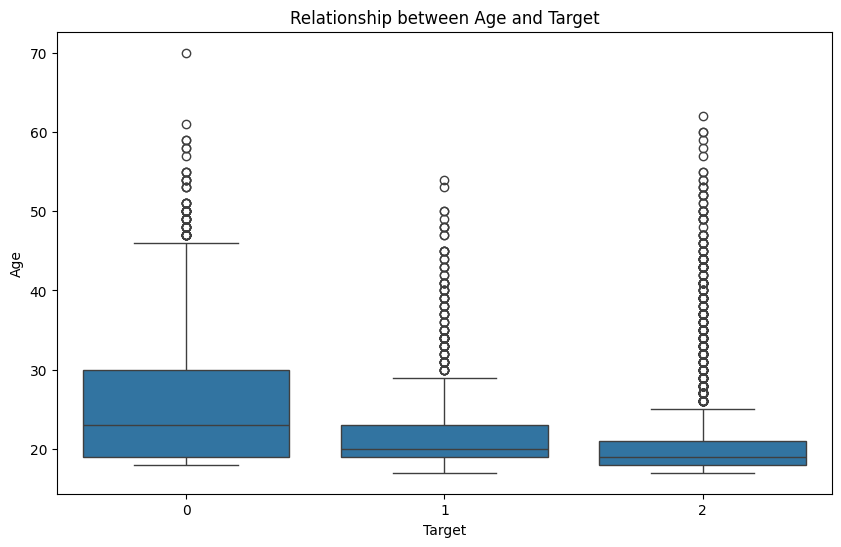

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Target', y='Age', data=df)
plt.xlabel('Target')
plt.ylabel('Age')
plt.title('Relationship between Age and Target')
plt.show()

<Axes: xlabel='Age', ylabel='Count'>

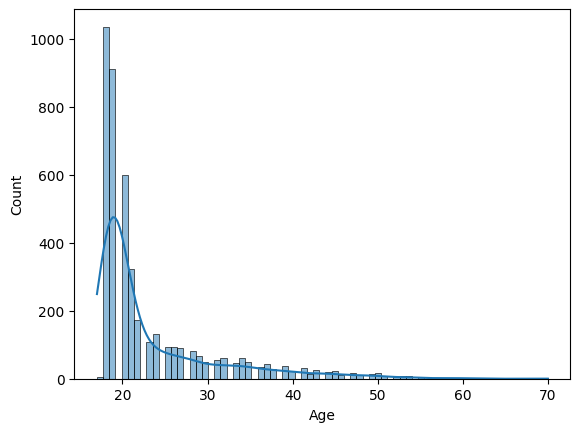

In [20]:
sns.histplot(data=df['Age'], kde=True)

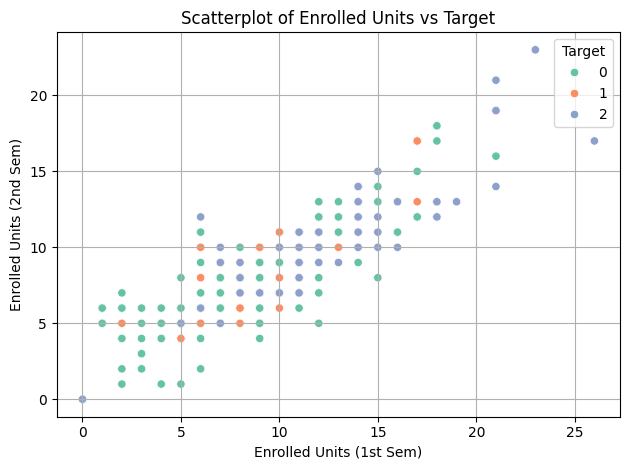

In [21]:
sns.scatterplot(
    data=df,
    x='Enrolled Units (1st Sem)',
    y='Enrolled Units (2nd Sem)',
    hue='Target',        # Color by categorical target
    palette='Set2'       # Optional: color palette
)

plt.title("Scatterplot of Enrolled Units vs Target")
plt.xlabel("Enrolled Units (1st Sem)")
plt.ylabel("Enrolled Units (2nd Sem)")
plt.grid(True)
plt.tight_layout()
plt.show()

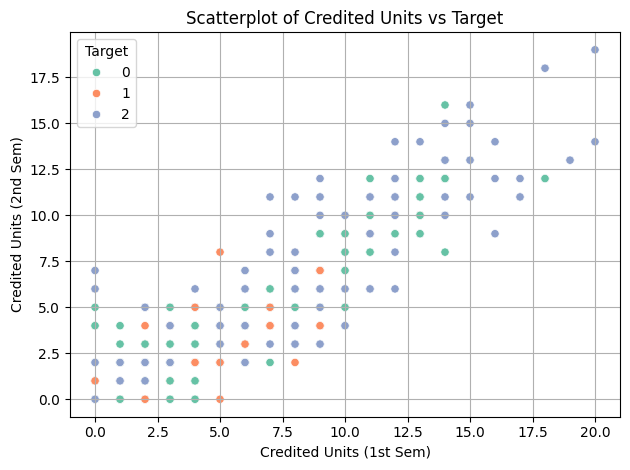

In [22]:
sns.scatterplot(
    data=df,
    x='Credited Units (1st Sem)',
    y='Credited Units (2nd Sem)',
    hue='Target',        # Color by categorical target
    palette='Set2'       # Optional: color palette
)

plt.title("Scatterplot of Credited Units vs Target")
plt.xlabel("Credited Units (1st Sem)")
plt.ylabel("Credited Units (2nd Sem)")
plt.grid(True)
plt.tight_layout()
plt.show()

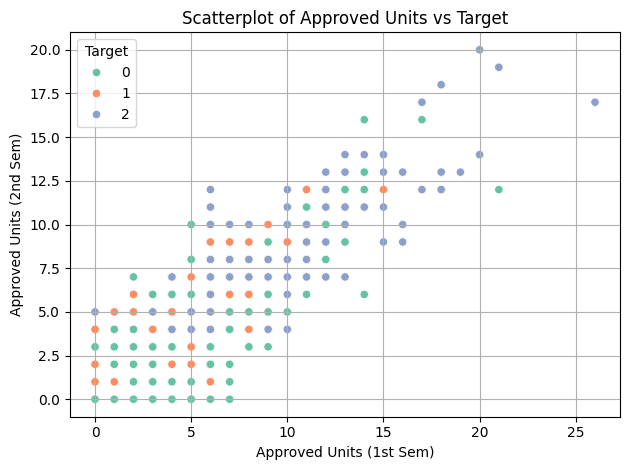

In [23]:
sns.scatterplot(
    data=df,
    x='Approved Units (1st Sem)',
    y='Approved Units (2nd Sem)',
    hue='Target',        # Color by categorical target
    palette='Set2'       # Optional: color palette
)

plt.title("Scatterplot of Approved Units vs Target")
plt.xlabel("Approved Units (1st Sem)")
plt.ylabel("Approved Units (2nd Sem)")
plt.grid(True)
plt.tight_layout()
plt.show()

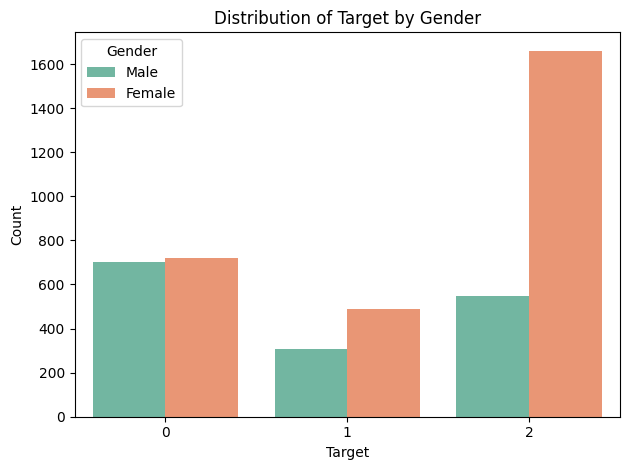

In [24]:
sns.countplot(data=df, x='Target', hue='Gender (1=Male, 0=Female)', palette='Set2')

plt.title("Distribution of Target by Gender")
plt.xlabel("Target")
plt.ylabel("Count")
plt.legend(title="Gender")
plt.tight_layout()
plt.show()

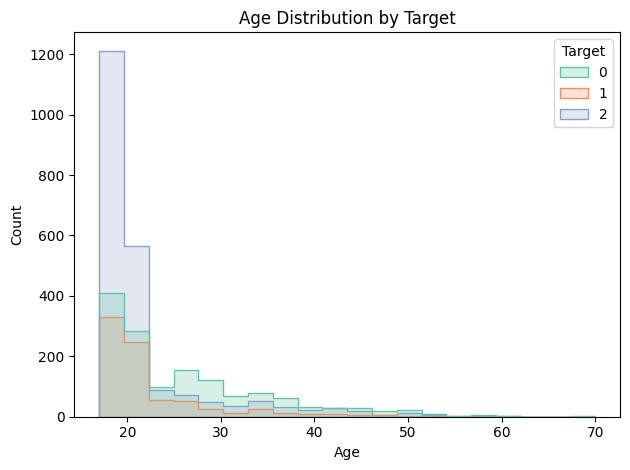

In [25]:
sns.histplot(
    data=df,
    x='Age',             # Continuous variable
    hue='Target',        # Category to color by
    bins=20,             # Number of bins
    kde=False,           # Set True if you want a smooth curve
    palette='Set2',
    element='step'       # Optional: use 'bars', 'step', or 'poly'
)

plt.title("Age Distribution by Target")
plt.xlabel("Age")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

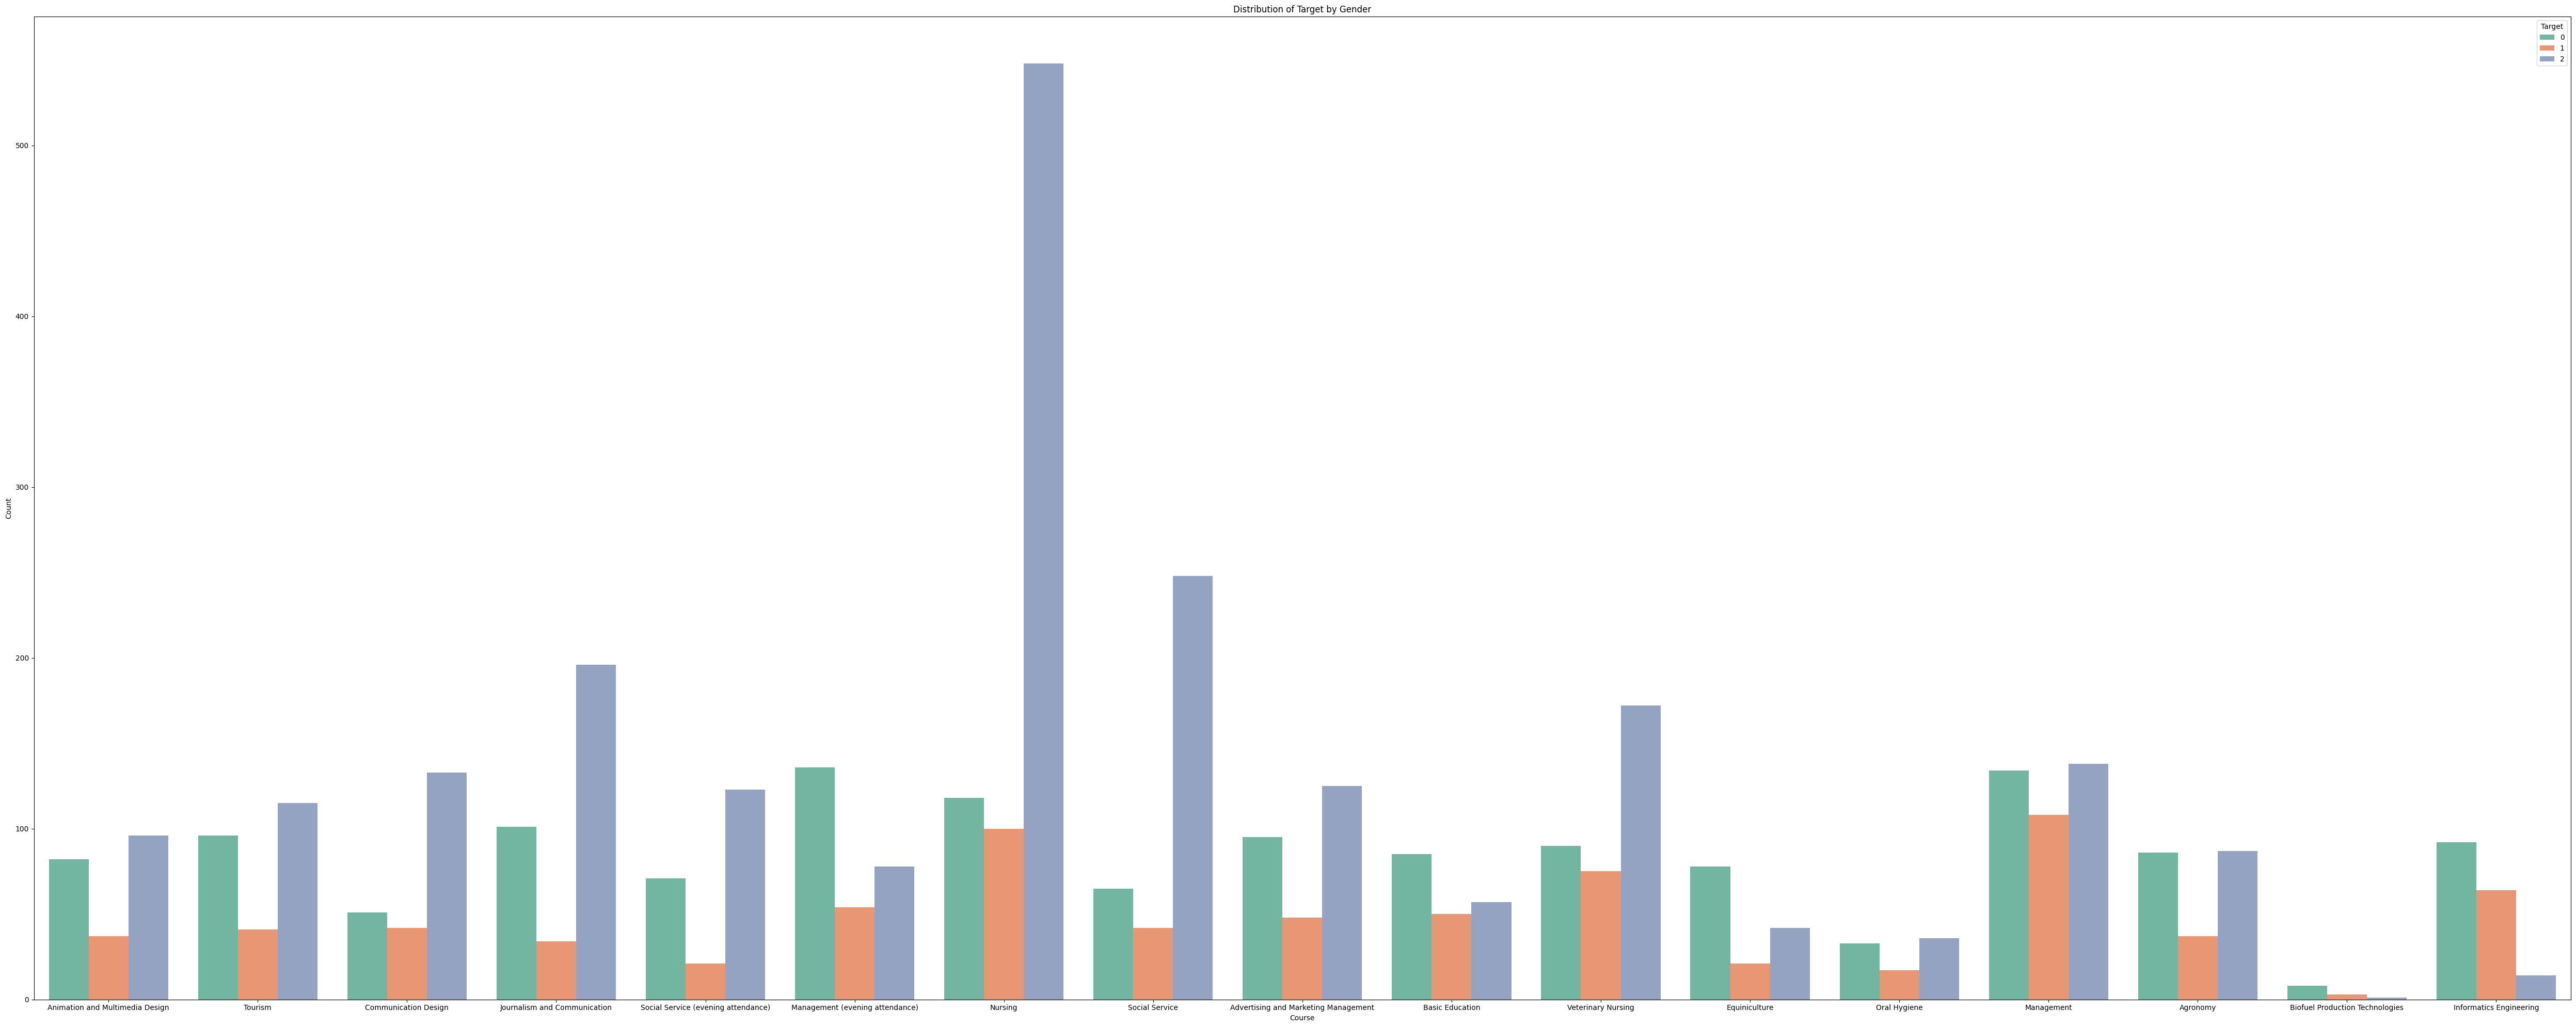

In [26]:
plt.figure(figsize=(50,20))
sns.countplot(data=df, x='Course Name', hue='Target', palette='Set2')

plt.title("Distribution of Target by Gender")
plt.xlabel("Course")
plt.ylabel("Count")
plt.legend(title="Target")
plt.tight_layout()
plt.show()

In [27]:
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    print(f"Unique values in column '{column}':")
    print(df[column].value_counts())
    print("-" * 40)

Unique values in column 'Marital Status':
Marital Status
Single               3919
Married               379
Divorced               91
Facto Union            25
Legally Separated       6
Widower                 4
Name: count, dtype: int64
----------------------------------------
Unique values in column 'Application Mode':
Application Mode
1st phase—general contingent                           1708
2nd phase—general contingent                            872
Over 23 years old                                       785
Change in course                                        312
Technological specialization diploma holders            213
Holders of other higher courses                         139
3rd phase—general contingent                            124
Transfer                                                 77
Change in institution/course                             59
1st phase—special contingent (Madeira Island)            38
Short cycle diploma holders                              35

In [28]:
binary_cols = ['Displaced Student', 'Is Debtor', 'Tuition Fees Up-to-Date', 'Scholarship Holder']

for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})


In [29]:
df['Gender'] = df['Gender (1=Male, 0=Female)'].map({'Male': 1, 'Female': 0})
df.drop('Gender (1=Male, 0=Female)', axis=1, inplace=True)

In [30]:
df['Daytime/Evening Attendance'] = df['Daytime/Evening Attendance'].map({
    'Daytime':0,
    'Evening':1
})

In [31]:
df['Marital Status'] = df['Marital Status'].map({
    'Single':0,
    'Married':1,
    'Divorced':2,
    'Facto Union':3,
    'Legally Separated':4,
    'Widower':5
})

In [ ]:
# df['Course Name']=df['Course Name'].map({
# 'Nursing':1,                                 
# 'Management':2,                              
# 'Social Service':3,                          
# 'Veterinary Nursing':4,                      
# 'Journalism and Communication':5,            
# 'Advertising and Marketing Management' :6,   
# 'Management (evening attendance)':7,         
# 'Tourism' :8,                                
# 'Communication Design':9,                    
# 'Animation and Multimedia Design':10,         
# 'Social Service (evening attendance)':11,     
# 'Agronomy':12,                                
# 'Basic Education':13,                         
# 'Informatics Engineering':14,                 
# 'Equiniculture':15,                           
# 'Oral Hygiene':16,                            
# 'Biofuel Production Technologies':17      
# })

In [32]:
df.dtypes

Marital Status                     int64
Application Mode                  object
Application Order                  int64
Course Name                       object
Daytime/Evening Attendance         int64
Previous Qualification            object
Mother's Qualification            object
Father's Qualification            object
Mother's Occupation               object
Father's Occupation               object
Displaced Student                  int64
Is Debtor                          int64
Tuition Fees Up-to-Date            int64
Scholarship Holder                 int64
Age                                int64
Credited Units (1st Sem)           int64
Enrolled Units (1st Sem)           int64
Evaluated Units (1st Sem)          int64
Approved Units (1st Sem)           int64
Average Grade (1st Sem)          float64
Not Evaluated Units (1st Sem)      int64
Credited Units (2nd Sem)           int64
Enrolled Units (2nd Sem)           int64
Evaluated Units (2nd Sem)          int64
Approved Units (

In [ ]:
# high_card_cols = [
#     'Application Mode',
#     'Course Name',
#     'Previous Qualification',
#     "Mother's Qualification",
#     "Father's Qualification",
#     "Mother's Occupation",
#     "Father's Occupation"
# ]

# from category_encoders import CatBoostEncoder
# encoder = CatBoostEncoder(cols=high_card_cols)
# df[high_card_cols] = encoder.fit_transform(df[high_card_cols], df['Target'])

#Not working


In [33]:
df.head(10)

,Marital Status,Application Mode,Application Order,Course Name,Daytime/Evening Attendance,Previous Qualification,Mother's Qualification,Father's Qualification,Mother's Occupation,Father's Occupation,...,Enrolled Units (2nd Sem),Evaluated Units (2nd Sem),Approved Units (2nd Sem),Average Grade (2nd Sem),Not Evaluated Units (2nd Sem),Unemployment Rate (%),Inflation Rate (%),GDP per Capita (USD),Target,Gender
0,0,2nd phase—general contingent,5,Animation and Multimedia Design,0,Secondary education,General commerce course,Other—11th Year,Service/Sales/Security,Unskilled Workers,...,0,0,0,0.000000,0,10.8,1.4,1.74,0,1
1,0,International student (bachelor),1,Tourism,0,Secondary education,Secondary Education,Higher Education Degree,Technicians & Professionals,Technicians & Professionals,...,6,6,6,13.666667,0,13.9,-0.3,0.79,2,1
2,0,1st phase—general contingent,5,Communication Design,0,Secondary education,Administration & Commerce course,Basic Edu 1st Cycle,Unskilled Workers,Unskilled Workers,...,6,0,0,0.000000,0,10.8,1.4,1.74,0,1
3,0,2nd phase—general contingent,2,Journalism and Communication,0,Secondary education,Accounting & Admin course,Basic Edu 1st Cycle,Service/Sales/Security,Technicians & Professionals,...,6,10,5,12.400000,0,9.4,-0.8,-3.12,2,0
4,1,Over 23 years old,1,Social Service (evening attendance),1,Secondary education,Administration & Commerce course,Basic Edu 2nd Cycle,Unskilled Workers,Unskilled Workers,...,6,6,6,13.000000,0,13.9,-0.3,0.79,2,0
5,1,Over 23 years old,1,Management (evening attendance),1,Basic education 3rd cycle,Administration & Commerce course,Basic Edu 1st Cycle,Unskilled Workers,Skilled Industry Workers,...,5,17,5,11.500000,5,16.2,0.3,-0.92,2,1
6,0,1st phase—general contingent,1,Nursing,0,Secondary education,General commerce course,Basic Edu 2nd Cycle,Skilled Industry Workers,Armed Forces,...,8,8,8,14.345000,0,15.5,2.8,-4.06,2,0
7,0,3rd phase—general contingent,4,Tourism,0,Secondary education,Administration & Commerce course,Basic Edu 1st Cycle,Unskilled Workers,Unskilled Workers,...,5,5,0,0.000000,0,15.5,2.8,-4.06,0,1
8,0,1st phase—general contingent,3,Social Service,0,Secondary education,Secondary Education,Secondary Education,Unskilled Workers,Unskilled Workers,...,6,7,6,14.142857,0,16.2,0.3,-0.92,2,0
9,0,1st phase—general contingent,1,Social Service,0,Secondary education,Secondary Education,Basic Education 3rd Cycle,Administrative Staff,Skilled Industry Workers,...,6,14,2,13.500000,0,8.9,1.4,3.51,0,0


In [34]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
categorical_cols = [
    'Application Mode', 'Previous Qualification',
    "Mother's Qualification", "Father's Qualification",
    "Mother's Occupation", "Father's Occupation",
    'Course Name'
]

for col in categorical_cols:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col].astype(str))


X = df_encoded[categorical_cols]
y = df_encoded['Target']  

mi_scores = mutual_info_classif(X, y, discrete_features=True)
mi_series = pd.Series(mi_scores, index=categorical_cols).sort_values(ascending=False)

print("📊 Mutual Information Scores (higher = more predictive):")
print(mi_series)


📊 Mutual Information Scores (higher = more predictive):
Course Name               0.066468
Application Mode          0.052221
Mother's Occupation       0.034022
Father's Occupation       0.030819
Father's Qualification    0.026018
Mother's Qualification    0.024848
Previous Qualification    0.024626
dtype: float64


In [35]:
import scipy.stats as ss

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(k - 1, r - 1))

print("\n📊 Cramér’s V Scores:")
for col in categorical_cols:
    score = cramers_v(df[col], df['Target'])
    print(f"{col}: {score:.3f}")



📊 Cramér’s V Scores:
Application Mode: 0.230
Previous Qualification: 0.158
Mother's Qualification: 0.157
Father's Qualification: 0.159
Mother's Occupation: 0.182
Father's Occupation: 0.173
Course Name: 0.251


In [36]:
df1 = df.copy()

from category_encoders import CatBoostEncoder

# Step 1: Define features
categorical_cols = [
    'Application Mode', 'Previous Qualification',
    "Mother's Qualification", "Father's Qualification",
    "Mother's Occupation", "Father's Occupation",
    'Course Name'
]

target_col = 'Target'

# Step 2: Split your data BEFORE encoding
X = df.drop(columns=[target_col])
y = df[target_col]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 3: Apply CatBoostEncoder only on training data
from category_encoders import CatBoostEncoder

encoder = CatBoostEncoder(cols=categorical_cols)

# Fit only on training data
X_train[categorical_cols] = encoder.fit_transform(X_train[categorical_cols], y_train)

# Transform test data (no fit here!)
X_test[categorical_cols] = encoder.transform(X_test[categorical_cols])


In [37]:
from sklearn.feature_selection import mutual_info_classif

# Mutual info between encoded features and target
mi_scores = mutual_info_classif(X_train[categorical_cols], y_train, discrete_features=False)
mi_series = pd.Series(mi_scores, index=categorical_cols).sort_values(ascending=False)

print("📊 Mutual Information Scores (encoded features vs target):")
print(mi_series)


📊 Mutual Information Scores (encoded features vs target):
Course Name               0.046376
Application Mode          0.042203
Father's Occupation       0.026811
Previous Qualification    0.024119
Mother's Qualification    0.019351
Father's Qualification    0.014114
Mother's Occupation       0.013685
dtype: float64


Since mi scores for Mother's Qualification,Father's Qualification,Mother's Occupation  is significantly low we will drop these columns 


In [38]:

numerical_df = df.select_dtypes(include=['int64', 'float64'])

correlation_matrix = numerical_df.corr()

print(correlation_matrix)


                               Marital Status  Application Order  \
Marital Status                       1.000000          -0.134295   
Application Order                   -0.134295           1.000000   
Daytime/Evening Attendance           0.295864          -0.158657   
Displaced Student                   -0.243076           0.332362   
Is Debtor                            0.035919          -0.072151   
Tuition Fees Up-to-Date             -0.086685           0.055891   
Scholarship Holder                  -0.065126           0.073709   
Age                                  0.551864          -0.271154   
Credited Units (1st Sem)             0.067361          -0.133354   
Enrolled Units (1st Sem)             0.049174          -0.016808   
Evaluated Units (1st Sem)            0.055009          -0.092156   
Approved Units (1st Sem)            -0.035605           0.035580   
Average Grade (1st Sem)             -0.067860           0.058308   
Not Evaluated Units (1st Sem)        0.040381   

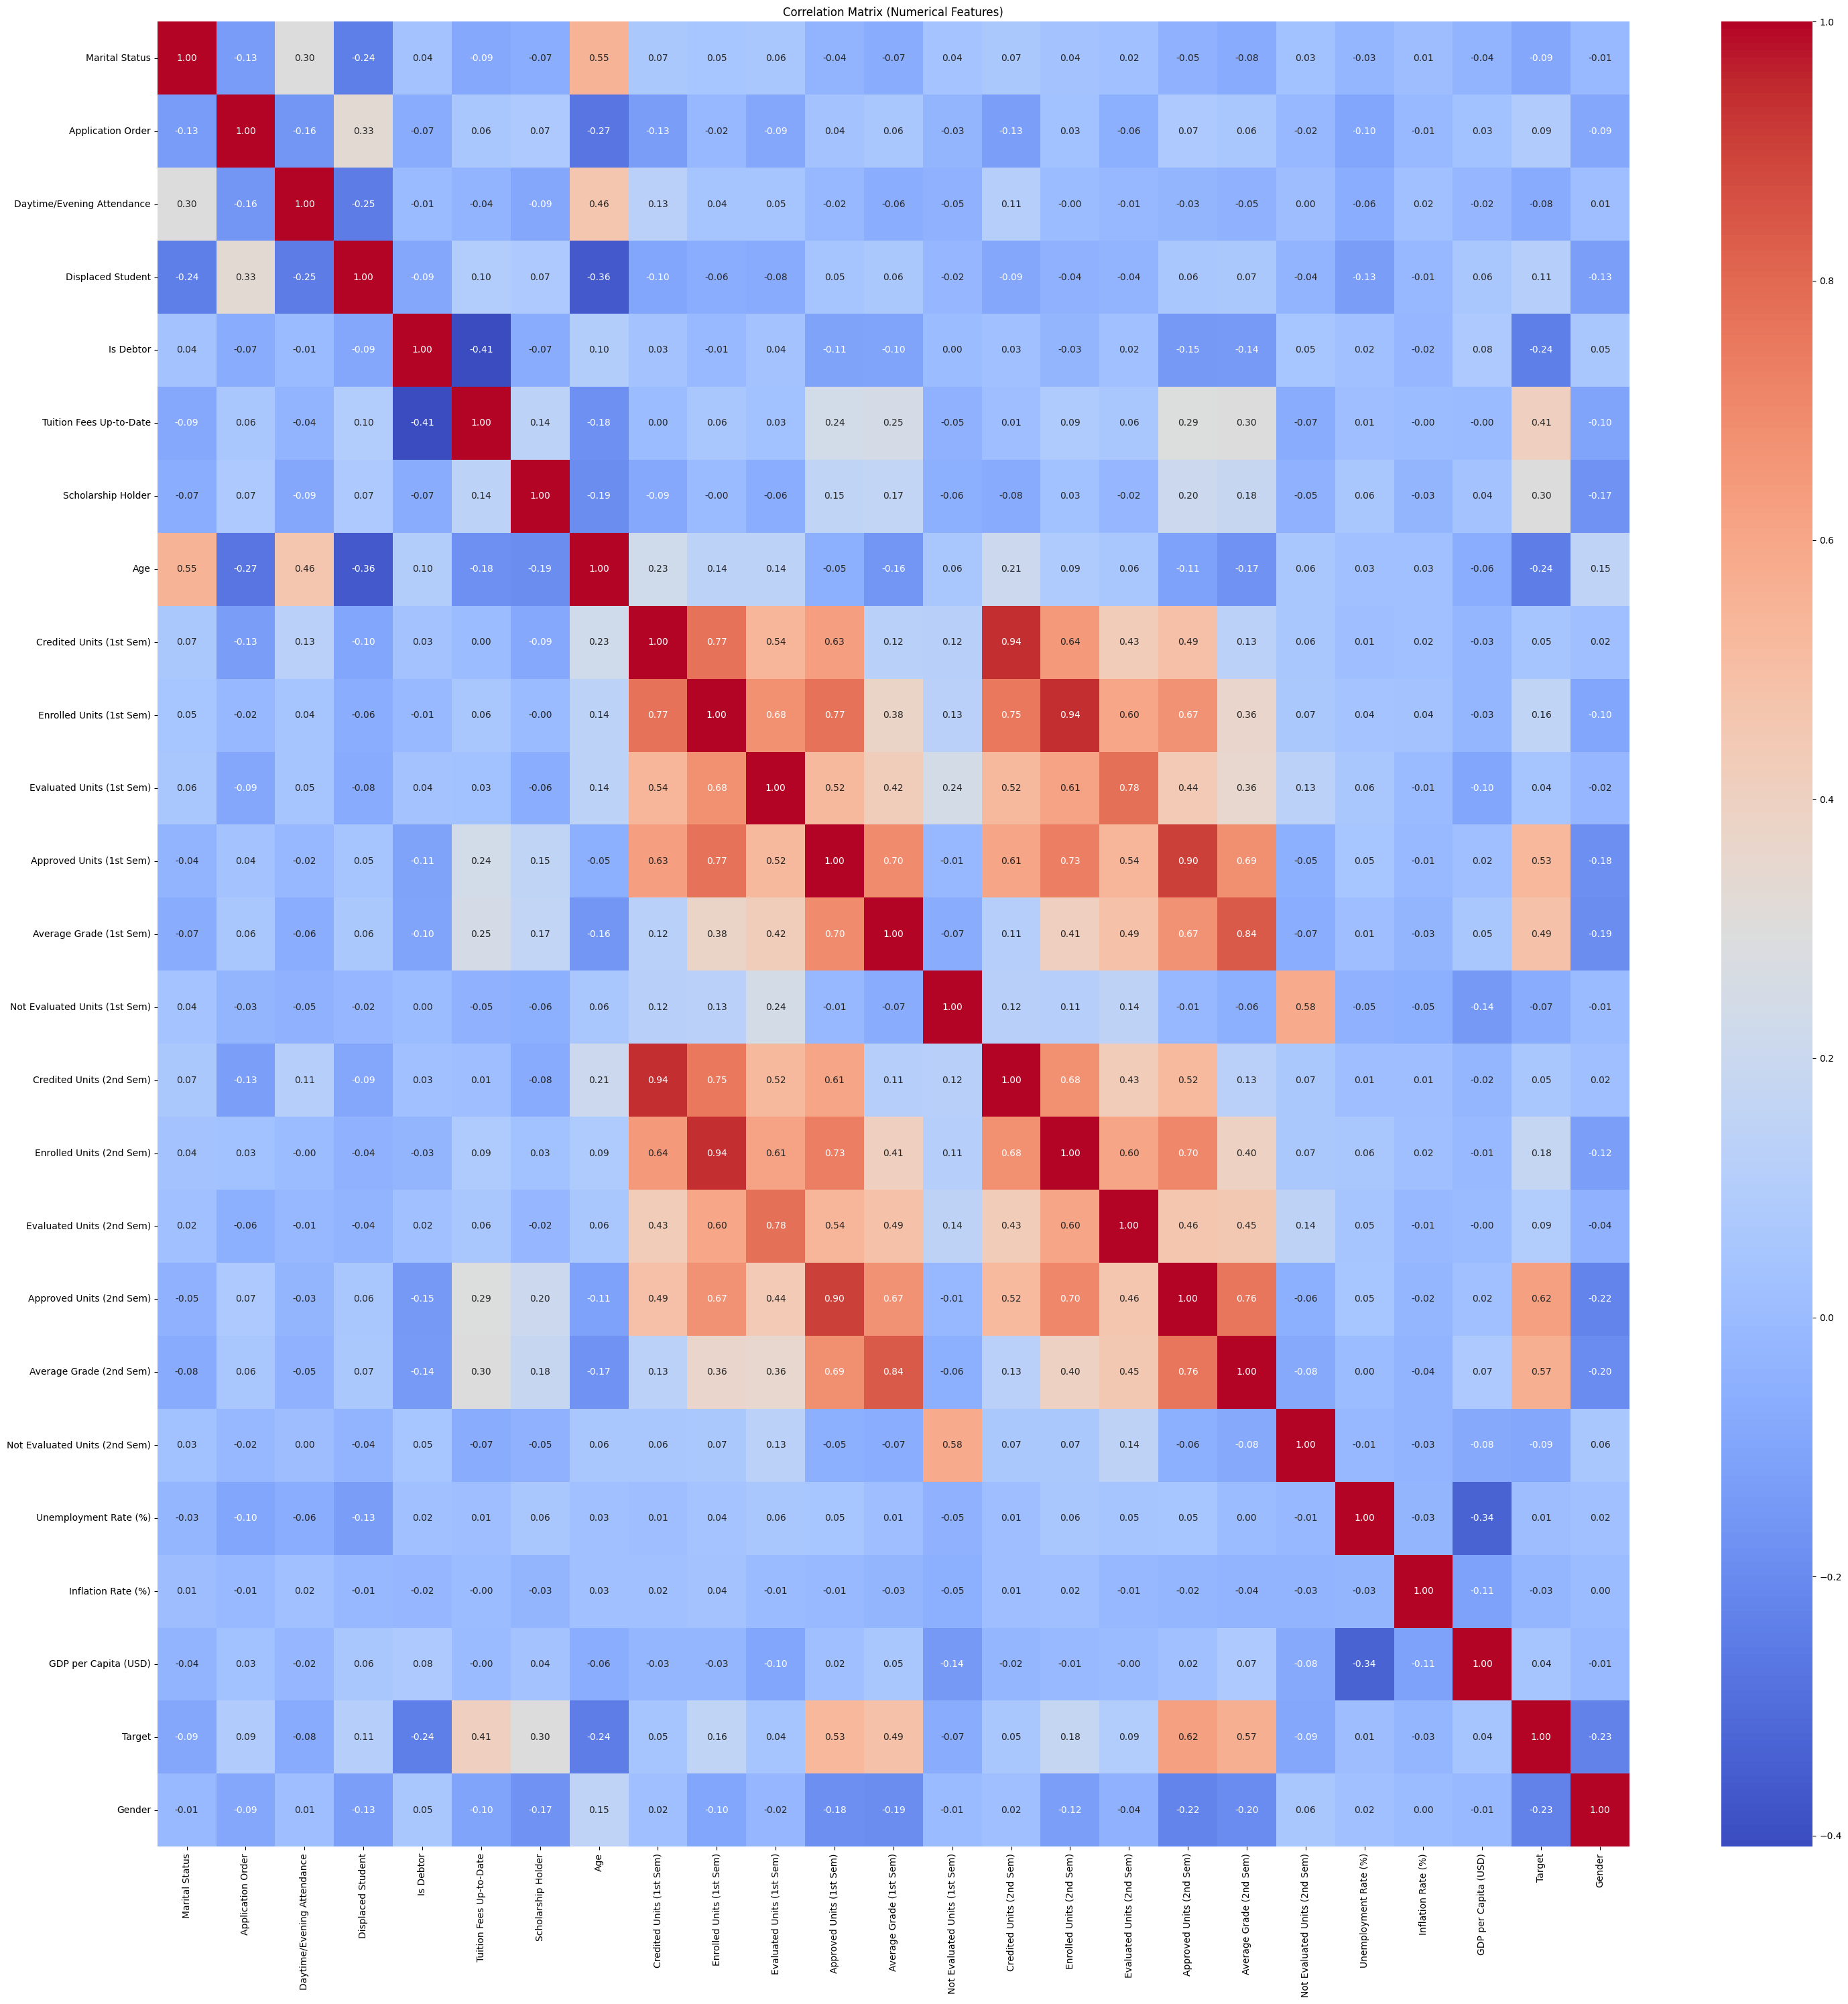

In [39]:
plt.figure(figsize=(30, 30))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix (Numerical Features)")
plt.tight_layout()
plt.show()

In [40]:
df.drop(['Mother\'s Qualification','Mother\'s Occupation','Father\'s Qualification'],axis=1,inplace =True)

In [41]:
df.sample(5)

,Marital Status,Application Mode,Application Order,Course Name,Daytime/Evening Attendance,Previous Qualification,Father's Occupation,Displaced Student,Is Debtor,Tuition Fees Up-to-Date,...,Enrolled Units (2nd Sem),Evaluated Units (2nd Sem),Approved Units (2nd Sem),Average Grade (2nd Sem),Not Evaluated Units (2nd Sem),Unemployment Rate (%),Inflation Rate (%),GDP per Capita (USD),Target,Gender
2287,0,2nd phase—general contingent,1,Tourism,0,Secondary education,Technicians & Professionals,0,0,1,...,6,8,6,14.428571,0,11.1,0.6,2.02,2,1
711,0,Over 23 years old,1,Informatics Engineering,0,Secondary education,Machine Operators,0,1,0,...,5,5,0,0.000000,0,15.5,2.8,-4.06,0,1
1082,0,Change in institution/course,1,Communication Design,0,Secondary education,Armed Forces,1,0,1,...,6,7,4,12.600000,0,8.9,1.4,3.51,1,0
2262,0,1st phase—general contingent,1,Tourism,0,Secondary education,Technicians & Professionals,0,0,1,...,6,6,0,0.000000,0,15.5,2.8,-4.06,0,1
2284,0,1st phase—general contingent,1,Communication Design,0,Secondary education,Administrative Staff,0,0,1,...,6,12,4,11.500000,0,13.9,-0.3,0.79,1,1


In [42]:
df.iloc[50]

Marital Status                                          0
Application Mode                        Over 23 years old
Application Order                                       1
Course Name                                       Tourism
Daytime/Evening Attendance                              0
Previous Qualification                Secondary education
Father's Occupation              Skilled Industry Workers
Displaced Student                                       0
Is Debtor                                               0
Tuition Fees Up-to-Date                                 1
Scholarship Holder                                      1
Age                                                    24
Credited Units (1st Sem)                                0
Enrolled Units (1st Sem)                                6
Evaluated Units (1st Sem)                               6
Approved Units (1st Sem)                                6
Average Grade (1st Sem)                         13.666667
Not Evaluated 

In [43]:
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    print(f"Unique values in column '{column}':")
    print(df[column].value_counts())
    print("-" * 40)

Unique values in column 'Application Mode':
Application Mode
1st phase—general contingent                           1708
2nd phase—general contingent                            872
Over 23 years old                                       785
Change in course                                        312
Technological specialization diploma holders            213
Holders of other higher courses                         139
3rd phase—general contingent                            124
Transfer                                                 77
Change in institution/course                             59
1st phase—special contingent (Madeira Island)            38
Short cycle diploma holders                              35
International student (bachelor)                         30
1st phase—special contingent (Azores Island)             16
Ordinance No. 854-B/99                                   10
Ordinance No. 612/93                                      3
Change in institution/course (Internati

In [44]:
df1 = df.copy()
import joblib

from category_encoders import CatBoostEncoder

# Step 1: Define features
categorical_cols = [
    'Application Mode', 'Previous Qualification',
     "Father's Occupation",
    'Course Name'
]

target_col = 'Target'

# Step 2: Split your data BEFORE encoding
X = df1.drop(columns=[target_col])
y = df1[target_col]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 3: Apply CatBoostEncoder only on training data
from category_encoders import CatBoostEncoder

encoder = CatBoostEncoder(cols=categorical_cols)

# Fit only on training data
X_train[categorical_cols] = encoder.fit_transform(X_train[categorical_cols], y_train)

# Transform test data (no fit here!)
X_test[categorical_cols] = encoder.transform(X_test[categorical_cols])

joblib.dump(encoder,"catboost_encoder.pkl")

['catboost_encoder.pkl']

In [45]:
from xgboost import XGBClassifier

model = XGBClassifier(n_estimators=100, random_state=2304, eval_metric='mlogloss', use_label_encoder=False) #
model.fit(X_train, y_train)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

y_pred = model.predict(X_test)
y_pred[:20]

c:\Users\anssa\OneDrive\Documents\student_dropout_prediction_app\stenv\Lib\site-packages\xgboost\training.py:183: UserWarning:

[00:06:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.




1.0
0.7581920903954802


array([2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 1, 1, 2, 0, 0, 0])

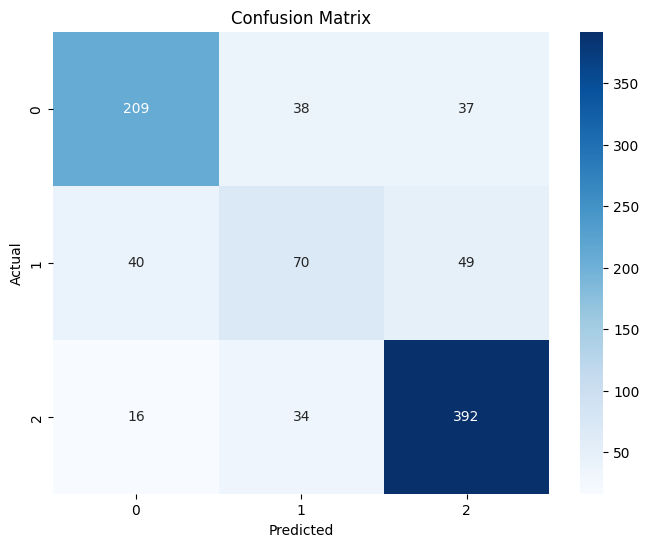

In [46]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred )
labels = sorted(y_test.unique()) if isinstance(y_test, pd.Series) else sorted(set(y_test))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [47]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(max_depth=10, random_state=0)

clf_rf.fit(X_train,y_train)
y_pred_rf = clf_rf.predict(X_test)
print("Without Scaling and without CV: ",accuracy_score(y_test,y_pred_rf))
scores = cross_val_score(clf_rf, X_train, y_train, cv=10)
print("Without Scaling and With CV: ",scores.mean())

Without Scaling and without CV:  0.7875706214689265
Without Scaling and With CV:  0.7632104159664538


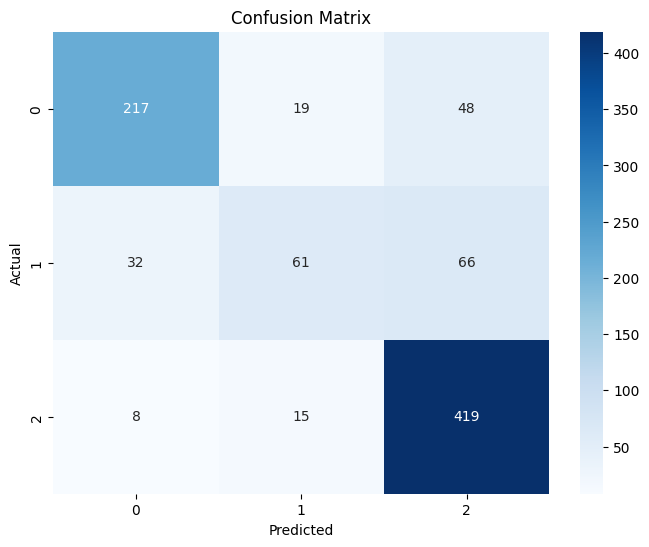

In [48]:
cm_rf = confusion_matrix(y_test,y_pred_rf )
labels = sorted(y_test.unique()) if isinstance(y_test, pd.Series) else sorted(set(y_test))

plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [49]:
from sklearn.linear_model import SGDClassifier
clf_sgd = SGDClassifier(max_iter=1000, tol=1e-3)

# Without Scaling
clf_sgd.fit(X_train,y_train)
y_pred_sgd = clf_sgd.predict(X_test)
print("Without Scaling and without CV: ",accuracy_score(y_test,y_pred_sgd))
scores = cross_val_score(clf_sgd, X_train, y_train, cv=10)
print("Without Scaling and With CV: ",scores.mean())

Without Scaling and without CV:  0.7649717514124293
Without Scaling and With CV:  0.6934051951793345


In [50]:
X_trans=pd.concat([X_train,X_test])
X_trans.shape

(4424, 28)

In [51]:
X_trans.head()

,Marital Status,Application Mode,Application Order,Course Name,Daytime/Evening Attendance,Previous Qualification,Father's Occupation,Displaced Student,Is Debtor,Tuition Fees Up-to-Date,...,Credited Units (2nd Sem),Enrolled Units (2nd Sem),Evaluated Units (2nd Sem),Approved Units (2nd Sem),Average Grade (2nd Sem),Not Evaluated Units (2nd Sem),Unemployment Rate (%),Inflation Rate (%),GDP per Capita (USD),Gender
2283,0,1.178016,1,1.178016,0,1.178016,1.178016,0,0,1,...,6,10,13,10,11.800000,0,13.9,-0.3,0.79,1
3874,0,1.178016,1,1.178016,0,1.178016,1.178016,1,1,0,...,0,5,5,0,0.000000,5,12.7,3.7,-1.70,1
2281,0,1.178016,1,1.178016,0,1.589008,1.178016,0,0,1,...,0,6,15,4,10.500000,0,15.5,2.8,-4.06,1
817,0,1.178016,1,1.178016,0,0.589008,1.178016,1,0,1,...,0,6,6,6,12.833333,0,12.4,0.5,1.79,0
404,0,1.178016,1,1.178016,0,1.059339,1.178016,1,0,1,...,0,8,8,7,14.731429,0,10.8,1.4,1.74,0


In [52]:
y_trans=pd.concat([y_train,y_test])
y_trans.isnull().sum()

np.int64(0)

In [53]:
y_trans.head()

2283    2
3874    0
2281    1
817     2
404     2
Name: Target, dtype: int64

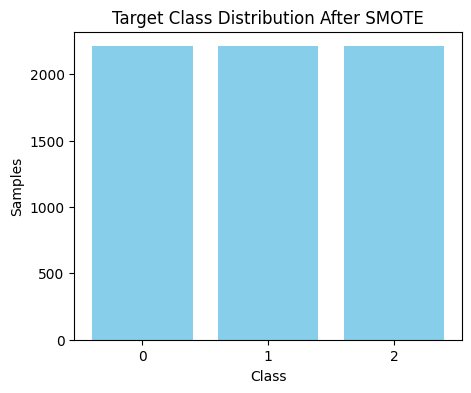

In [54]:
import os
os.environ["SCIPY_ARRAY_API"] = "1"
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE(random_state=42)
X_transformed, y_transformed = smote.fit_resample(X_trans,y_trans)

# Count target class distribution
counter = Counter(y_transformed)

# Plot the new class distribution
plt.figure(figsize=(5, 4))
plt.bar(counter.keys(), counter.values(), color='skyblue')
plt.xlabel("Class")
plt.ylabel("Samples")
plt.title("Target Class Distribution After SMOTE")
plt.xticks(list(counter.keys()))
plt.show()

In [55]:
X_train_2,X_test_2,y_train_2,y_test_2 = train_test_split(X_transformed,y_transformed,test_size=0.2)

In [56]:
from xgboost import XGBClassifier

model = XGBClassifier(n_estimators=100, random_state=2304, eval_metric='mlogloss', use_label_encoder=False) #
model.fit(X_train_2, y_train_2)

print(model.score(X_train_2, y_train_2))
print(model.score(X_test_2, y_test_2))

y_pred_new = model.predict(X_test_2)
y_pred_new[:20]

c:\Users\anssa\OneDrive\Documents\student_dropout_prediction_app\stenv\Lib\site-packages\xgboost\training.py:183: UserWarning:

[00:08:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.




0.9984908507828711
0.8288084464555053


array([0, 2, 1, 1, 1, 0, 0, 1, 1, 2, 0, 1, 1, 0, 0, 0, 2, 1, 2, 2])

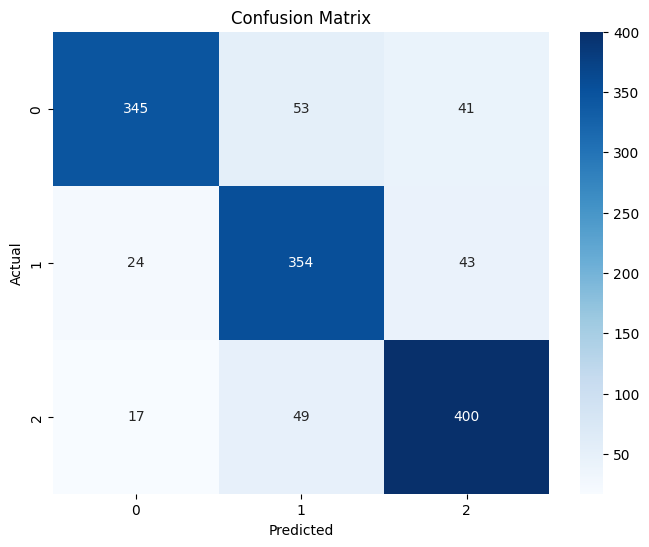

In [57]:
from sklearn.metrics import confusion_matrix
cm_new = confusion_matrix(y_test_2,y_pred_new )
labels = sorted(y_test.unique()) if isinstance(y_test_2, pd.Series) else sorted(set(y_test_2))

plt.figure(figsize=(8, 6))
sns.heatmap(cm_new, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [58]:
from sklearn.ensemble import RandomForestClassifier

clf_rf_2 = RandomForestClassifier(max_depth=25, random_state=0)

clf_rf_2.fit(X_train_2,y_train_2)
y_pred_rf_2 = clf_rf_2.predict(X_test_2)
print("Without Scaling and without CV: ",accuracy_score(y_test_2,y_pred_rf_2))
scores = cross_val_score(clf_rf_2, X_train_2, y_train_2, cv=10)
print("Without Scaling and With CV: ",scores.mean())

Without Scaling and without CV:  0.8333333333333334
Without Scaling and With CV:  0.8341893188359449


In [59]:
from sklearn.linear_model import SGDClassifier
clf_sgd = SGDClassifier(max_iter=1000, tol=1e-3)

# Without Scaling
clf_sgd.fit(X_train_2,y_train_2)
y_pred_sgd_2 = clf_sgd.predict(X_test_2)
print("Without Scaling and without CV: ",accuracy_score(y_test_2,y_pred_sgd_2))
scores = cross_val_score(clf_sgd, X_train_2, y_train_2, cv=10)
print("Without Scaling and With CV: ",scores.mean())

Without Scaling and without CV:  0.717948717948718
Without Scaling and With CV:  0.6594918807518744


In [60]:
from sklearn.tree import DecisionTreeClassifier
clf_dt = DecisionTreeClassifier(random_state=0)

#without scaling
clf_dt.fit(X_train_2,y_train_2)
y_pred_dt = clf_dt.predict(X_test_2)
print("Without Scaling and without CV: ",accuracy_score(y_test_2,y_pred_dt))
scores = cross_val_score(clf_dt, X_train_2, y_train_2, cv=10)
print("Without Scaling and With CV: ",scores.mean())

Without Scaling and without CV:  0.7073906485671192
Without Scaling and With CV:  0.7289226450627153


In [61]:
from xgboost import XGBClassifier
import joblib

model = XGBClassifier(n_estimators=100, random_state=2304, eval_metric='mlogloss', use_label_encoder=False) #
model.fit(X_train_2, y_train_2)

print(model.score(X_train_2, y_train_2))
print(model.score(X_test, y_test))

y_pred_org = model.predict(X_test)
y_pred_org[:20]
joblib.dump(model, "model_xgb.pkl")

c:\Users\anssa\OneDrive\Documents\student_dropout_prediction_app\stenv\Lib\site-packages\xgboost\training.py:183: UserWarning:

[00:11:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.




0.9984908507828711
0.9525423728813559


['model_xgb.pkl']

In [62]:
from sklearn.ensemble import RandomForestClassifier

clf_rf_org = RandomForestClassifier(max_depth=25, random_state=0)

clf_rf_org.fit(X_train_2,y_train_2)
y_pred_rf_org = clf_rf_org.predict(X_test)
print("Without Scaling and without CV: ",accuracy_score(y_test,y_pred_rf_org))
scores = cross_val_score(clf_rf_org, X_train_2, y_train_2, cv=10)
print("Without Scaling and With CV: ",scores.mean())
joblib.dump(model, "model_rf.pkl")

Without Scaling and without CV:  0.9570621468926553
Without Scaling and With CV:  0.8341893188359449


['model_rf.pkl']